# Loan Repayment Prediction

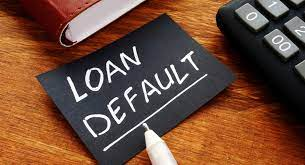

# Table of Contents

- [Loading Packages](#Loading-Packages)
- [Understanding Data](#Understanding-Data)
- [Data Cleaning](#Data-Cleaning)
- [Data Visualizations](#Data-Visualizations)
- [Data Preprocessing](#Data-Preprocessing)
- [Training Models](#Training-Models)
    - [Decision Tree Classifier](#Decision-Tree-Classifier)
    - [Gradient Boosting Classifier](#Gradient-Boosting-Classifier)

## Loading Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading data
df = pd.read_csv('loan_data.csv')

## Understanding Data

In [5]:
# The shape of the dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (9578, 14)


In [6]:
# Preview of the first 5 rows of dataset
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Data Cleaning 

In [9]:
# Check for missing values
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [10]:
# Check for duplicate values
df.duplicated().sum()

0

In [11]:
# Renaming columns
df.columns = ['credit_policy', 'purpose', 'interest_rate', 'installment', 'log_annual_inc', 'debt_to_income (%)', 'fico', 'length_of_credit (days)', 'revol_balance', 'revol_utiliz', 'inqs_past_6months', 'delinq_2yrs', 'public_records', 'not_fully_paid']

In [12]:
df.head()

,credit_policy,purpose,interest_rate,installment,log_annual_inc,debt_to_income (%),fico,length_of_credit (days),revol_balance,revol_utiliz,inqs_past_6months,delinq_2yrs,public_records,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Data Visualizations

Text(0.5, 0, 'FICO')

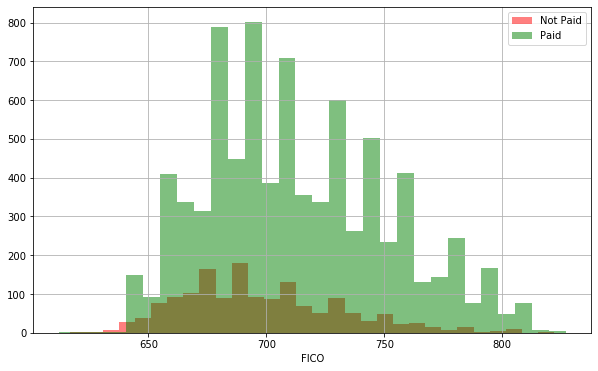

In [13]:
# Distribution of FICO scores categorized by loans paid or not
plt.figure(figsize=(10,6))
df[df['not_fully_paid']==1]['fico'].hist(bins=30, alpha=0.5, color='red', label='Not Paid')
df[df['not_fully_paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='Paid')
plt.legend()
plt.xlabel('FICO')

<Figure size 720x432 with 0 Axes>

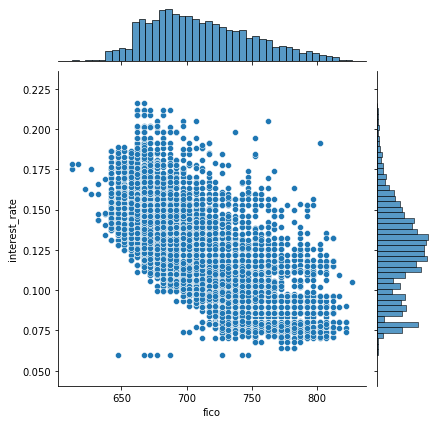

In [14]:
# Distribution and correlation plot between interest rate and fico score
plt.figure(figsize=(10,6))
sns.jointplot(x='fico', y='interest_rate', data=df)

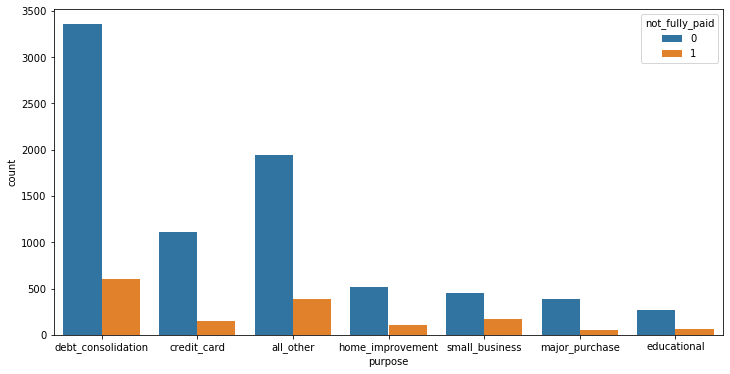

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='purpose', hue='not_fully_paid')

[Text(0, 0.5, 'Installment'), Text(0.5, 0, 'Paid or Not')]

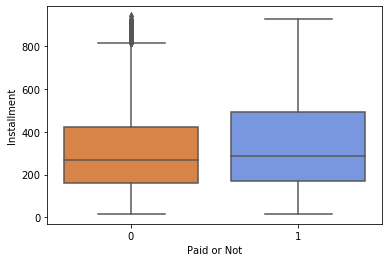

In [16]:
colors = ['#F08030', '#6890F0']
ax = sns.boxplot(x='not_fully_paid', y='installment', data=df, palette=colors)
ax.set(xlabel="Paid or Not", ylabel="Installment")

[Text(0, 0.5, 'Length of Credit (days)'), Text(0.5, 0, 'Paid or Not')]

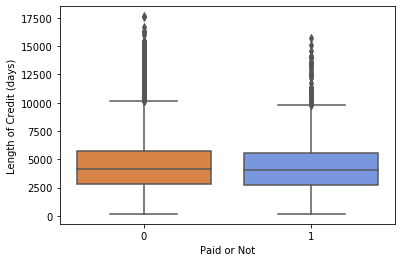

In [17]:
ax = sns.boxplot(x='not_fully_paid', y='length_of_credit (days)', data=df, palette=colors)
ax.set(xlabel="Paid or Not", ylabel="Length of Credit (days)")

### Data Visualization Conclusion
- The distribution of FICO scores is relatively normal between both categories of the loan being paid or not, but a larger amount of people who have paid the loans have a higher FICO score
- As expected, there is a negative correlation between interest rates and FICO scores
- There are 7 reasons as to why people originally agreed to the loan, with a majority of people falling under the 'debt consolidation' segment

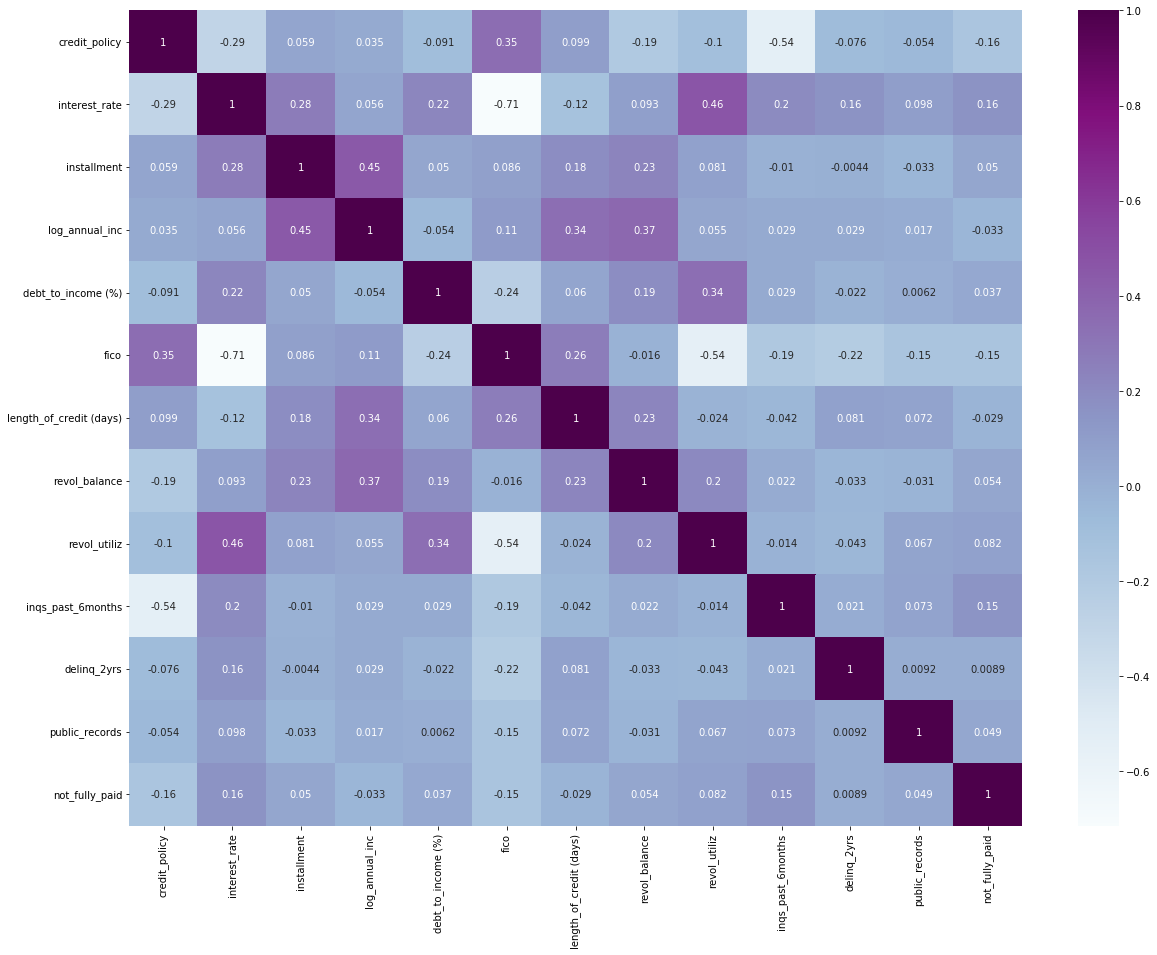

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap='BuPu', annot=True)
plt.show()

## Data Preprocessing

In [19]:
# Encoding categorical variables in 'purpose' column using Label Encoder
df['purpose']=LabelEncoder().fit_transform(df['purpose'])
df.head()

,credit_policy,purpose,interest_rate,installment,log_annual_inc,debt_to_income (%),fico,length_of_credit (days),revol_balance,revol_utiliz,inqs_past_6months,delinq_2yrs,public_records,not_fully_paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [20]:
# Splitting dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(df.drop('not_fully_paid', 1), df['not_fully_paid'], test_size=0.2)

In [21]:
# Defining parameter range
param_grid = {'max_depth': [2,3, 4,5,6,7,8,9,10,11,13,15,20]}

dt_clf = DecisionTreeClassifier()
grid = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
# Fitting model for grid search
grid.fit(X_train,y_train)
# Print best parameter after tuning
print(grid.best_params_)

{'max_depth': 2}


## Training Models

### Decision Tree Classifier

In [22]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [23]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[1635    0]
 [ 281    0]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1635
           1       0.00      0.00      0.00       281

    accuracy                           0.85      1916
   macro avg       0.43      0.50      0.46      1916
weighted avg       0.73      0.85      0.79      1916



<---------------Accuracy Scores------------------->

Train Accuracy score:  0.8365961889845993
Test Accuracy score: 0.8533402922755741


### Gradient Boosting Classifier

In [24]:
gb_clf = GradientBoostingClassifier(learning_rate = 0.05)
gb_clf.fit(X_train, y_train)
y_pred_train = gb_clf.predict(X_train)
y_pred_test = gb_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [25]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

Confusion Matrix 
 [[1633    2]
 [ 277    4]]


<-------------------Classification Report---------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1635
           1       0.67      0.01      0.03       281

    accuracy                           0.85      1916
   macro avg       0.76      0.51      0.47      1916
weighted avg       0.83      0.85      0.79      1916



<---------------Accuracy Scores------------------->

Train Accuracy score:  0.84286087183503
Test Accuracy score: 0.8543841336116911


## We found that the best model for this prediction is a Gradient Boosting Classifier with an accuracy of 85.4% on the testing subset